In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#!pip install seaborn
#import seaborn as sns

In [2]:
s_bike = pd.read_csv('SeoulBikeData.csv', encoding= 'unicode_escape')
s_bike.head(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [3]:
col_name = s_bike.columns.values.tolist()
col_name

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

<AxesSubplot:xlabel='Date,Date'>

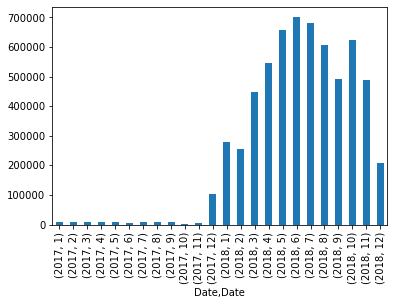

In [4]:
s_bike.groupby([pd.DatetimeIndex(s_bike['Date']).year,
                pd.DatetimeIndex(s_bike['Date']).month])['Rented Bike Count'].sum().plot(kind = 'bar')

In [5]:
nm_chng = {
    'Date': 'date',
    'Rented Bike Count': 'bike_count',
    'Hour': 'hour',
    'Temperature(°C)': 'temp',
    'Humidity(%)': 'humidity',
    'Wind speed (m/s)': 'wind_speed',
    'Visibility (10m)': 'visibility',
    'Dew point temperature(°C)': 'dp_temp',
    'Solar Radiation (MJ/m2)': 'solar_rad',
    'Rainfall(mm)': 'rainfall',
    'Snowfall (cm)': 'snowfall',
    'Seasons': 'seasons',
    'Holiday': 'holiday',
    'Functioning Day': 'func_day'
    }

In [6]:
s_bike.rename(columns = nm_chng, inplace = True)

In [7]:
s_bike.columns

Index(['date', 'bike_count', 'hour', 'temp', 'humidity', 'wind_speed',
       'visibility', 'dp_temp', 'solar_rad', 'rainfall', 'snowfall', 'seasons',
       'holiday', 'func_day'],
      dtype='object')

In [8]:
season = s_bike['seasons'].unique()
season

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [9]:
ssn_cat = {}
for i, j in enumerate(season):
  ssn_cat[j] = i

ssn_cat

{'Winter': 0, 'Spring': 1, 'Summer': 2, 'Autumn': 3}

In [10]:
s_bike['seasons'] = s_bike['seasons'].map(ssn_cat)

In [11]:
hol_cat = {'No Holiday': 0,
           'Holiday': 1}

fd_cat = {'No': 0,
          'Yes': 1}

In [12]:
s_bike['holiday'] = s_bike['holiday'].map(hol_cat)
s_bike['func_day'] = s_bike['func_day'].map(fd_cat)

In [13]:
s_bike.head(10)

,date,bike_count,hour,temp,humidity,wind_speed,visibility,dp_temp,solar_rad,rainfall,snowfall,seasons,holiday,func_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,0,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,0,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,0,0,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,0,0,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,0,0,1
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,0,0,1
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,0,0,1
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,0,0,1
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,0,0,1
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,0,0,1


In [14]:
s_bike.describe()

,bike_count,hour,temp,humidity,wind_speed,visibility,dp_temp,solar_rad,rainfall,snowfall,seasons,holiday,func_day
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,1.504110,0.049315,0.966324
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,1.114408,0.216537,0.180404
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,2.000000,0.000000,1.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,2.000000,0.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,3.000000,1.000000,1.000000


In [15]:
s_bike['date'] = pd.to_datetime(s_bike['date'])

figure = plt.figure(dpi = 150)
sns.heatmap(s_bike.corr(), vmax = 1, vmin = -1, center = 0, cmap = 'YlGnBu')
plt.show()
plt.close()

In [16]:
s_bike.groupby(['seasons','holiday'])['bike_count'].mean()

seasons  holiday
0        0           232.264736
         1           156.625000
1        0           733.224251
         1           635.305556
2        0          1034.338426
         1          1022.145833
3        0           823.151163
         1           758.483333
Name: bike_count, dtype: float64

In [17]:
s_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        8760 non-null   datetime64[ns]
 1   bike_count  8760 non-null   int64         
 2   hour        8760 non-null   int64         
 3   temp        8760 non-null   float64       
 4   humidity    8760 non-null   int64         
 5   wind_speed  8760 non-null   float64       
 6   visibility  8760 non-null   int64         
 7   dp_temp     8760 non-null   float64       
 8   solar_rad   8760 non-null   float64       
 9   rainfall    8760 non-null   float64       
 10  snowfall    8760 non-null   float64       
 11  seasons     8760 non-null   int64         
 12  holiday     8760 non-null   int64         
 13  func_day    8760 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(7)
memory usage: 958.2 KB


In [18]:
import datetime
year = s_bike['date'].map(lambda d: '01-01-%d' % d.year).astype('datetime64')

In [19]:
year

0      2017-01-01
1      2017-01-01
2      2017-01-01
3      2017-01-01
4      2017-01-01
          ...    
8755   2018-01-01
8756   2018-01-01
8757   2018-01-01
8758   2018-01-01
8759   2018-01-01
Name: date, Length: 8760, dtype: datetime64[ns]

<AxesSubplot:xlabel='date,date'>

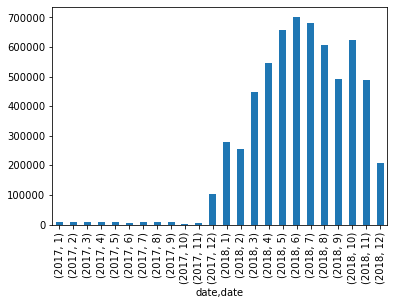

In [20]:
s_bike.groupby([pd.DatetimeIndex(s_bike['date']).year,
                pd.DatetimeIndex(s_bike['date']).month])['bike_count'].sum().plot(kind = 'bar')

<AxesSubplot:xlabel='date,date'>

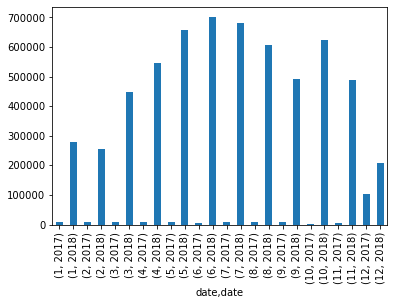

In [21]:
s_bike.groupby([pd.DatetimeIndex(s_bike['date']).month,
                pd.DatetimeIndex(s_bike['date']).year])['bike_count'].sum().plot(kind = 'bar')

<AxesSubplot:xlabel='seasons,date'>

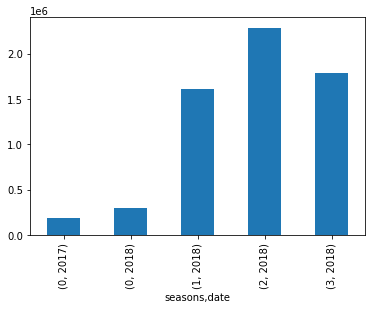

In [22]:
s_bike.groupby(['seasons',
               pd.DatetimeIndex(s_bike['date']).year])['bike_count'].sum().plot(kind = 'bar')

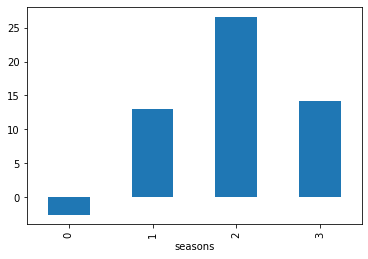

In [23]:
s_bike.groupby('seasons')['temp'].mean().plot(kind = 'bar')
plt.show()
plt.close()

In [24]:
import datetime
day_name = []
for i in s_bike['date']:
  day_name.append(i.strftime('%A'))

s_bike['day_name'] = day_name

In [25]:
s_bike['weekdays'] = np.where(s_bike['day_name'].values == ['Friday','Saturday'], 0,1)

ipykernel_launcher:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


In [26]:
s_bike['day_name'] == 'Sunday'

0       False
1       False
2       False
3       False
4       False
        ...  
8755    False
8756    False
8757    False
8758    False
8759    False
Name: day_name, Length: 8760, dtype: bool

In [27]:

week_num = {'Sunday': 1,
            'Monday': 2,
            'Tuesday': 3,
            'Wednesday': 4,
            'Thursday': 5,
            'Friday': 6,
            'Saturday': 7}

s_bike['day_num'] = s_bike['day_name'].map(week_num)

In [28]:
s_bike.drop('day_name', axis = 1, inplace = True)

In [29]:
s_bike['day'] = pd.DatetimeIndex(s_bike['date']).day
s_bike['month'] = pd.DatetimeIndex(s_bike['date']).month
s_bike['year'] = pd.DatetimeIndex(s_bike['date']).year

In [30]:
s_bike.drop('date', axis = 1, inplace = True)

In [31]:
s_bike.head(10)

,bike_count,hour,temp,humidity,wind_speed,visibility,dp_temp,solar_rad,rainfall,snowfall,seasons,holiday,func_day,weekdays,day_num,day,month,year
0,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,0,0,1,1,5,12,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,0,0,1,1,5,12,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,0,0,1,1,5,12,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,0,0,1,1,5,12,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,0,0,1,1,5,12,1,2017
5,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,0,0,1,1,5,12,1,2017
6,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,0,0,1,1,5,12,1,2017
7,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,0,0,1,1,5,12,1,2017
8,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,0,0,1,1,5,12,1,2017
9,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,0,0,1,1,5,12,1,2017


In [32]:
s_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_count  8760 non-null   int64  
 1   hour        8760 non-null   int64  
 2   temp        8760 non-null   float64
 3   humidity    8760 non-null   int64  
 4   wind_speed  8760 non-null   float64
 5   visibility  8760 non-null   int64  
 6   dp_temp     8760 non-null   float64
 7   solar_rad   8760 non-null   float64
 8   rainfall    8760 non-null   float64
 9   snowfall    8760 non-null   float64
 10  seasons     8760 non-null   int64  
 11  holiday     8760 non-null   int64  
 12  func_day    8760 non-null   int64  
 13  weekdays    8760 non-null   int32  
 14  day_num     8760 non-null   int64  
 15  day         8760 non-null   int64  
 16  month       8760 non-null   int64  
 17  year        8760 non-null   int64  
dtypes: float64(6), int32(1), int64(11)
memory usage: 1.2 MB


In [33]:
s_bike.corr()

,bike_count,hour,temp,humidity,wind_speed,visibility,dp_temp,solar_rad,rainfall,snowfall,seasons,holiday,func_day,weekdays,day_num,day,month,year
bike_count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,3.596867e-01,-7.233757e-02,0.203943,NaN,4.953460e-02,4.684885e-02,7.086107e-02,2.151618e-01
hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,2.544659e-15,-1.391486e-16,0.005439,NaN,1.261318e-17,4.206322e-16,1.036729e-15,2.336763e-14
temp,0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,5.915453e-01,-5.593084e-02,-0.050170,NaN,6.603053e-03,8.090791e-02,4.968327e-02,3.777958e-01
humidity,-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,1.892379e-01,-5.027765e-02,-0.020800,NaN,-4.653905e-03,7.047359e-03,4.779778e-02,3.592468e-02
wind_speed,0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-1.668339e-01,2.301677e-02,0.005037,NaN,2.158618e-02,-6.123440e-02,-8.206909e-02,-3.780878e-03
visibility,0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,1.119742e-01,3.177281e-02,-0.026000,NaN,3.876812e-02,-1.068595e-01,7.788783e-02,5.238110e-02
dp_temp,0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,5.824180e-01,-6.675910e-02,-0.052837,NaN,8.023148e-04,6.970777e-02,6.510073e-02,3.363497e-01
solar_rad,0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,9.468096e-02,-5.077255e-03,-0.007665,NaN,1.911955e-02,-3.445555e-03,-3.041240e-02,1.280860e-01
rainfall,-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,3.345293e-02,-1.426911e-02,0.002055,NaN,-1.230032e-02,1.199827e-02,-2.279368e-02,2.752192e-02
snowfall,-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,-1.454573e-01,-1.259072e-02,0.032089,NaN,6.581537e-03,1.014355e-01,5.475846e-02,-2.064178e-01


In [34]:
s_bike.corr().nlargest(6, "bike_count")

,bike_count,hour,temp,humidity,wind_speed,visibility,dp_temp,solar_rad,rainfall,snowfall,seasons,holiday,func_day,weekdays,day_num,day,month,year
bike_count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,3.596867e-01,-7.233757e-02,0.203943,NaN,4.953460e-02,4.684885e-02,7.086107e-02,2.151618e-01
temp,0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,5.915453e-01,-5.593084e-02,-0.050170,NaN,6.603053e-03,8.090791e-02,4.968327e-02,3.777958e-01
hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,2.544659e-15,-1.391486e-16,0.005439,NaN,1.261318e-17,4.206322e-16,1.036729e-15,2.336763e-14
dp_temp,0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,5.824180e-01,-6.675910e-02,-0.052837,NaN,8.023148e-04,6.970777e-02,6.510073e-02,3.363497e-01
seasons,0.359687,2.544659e-15,0.591545,0.189238,-0.166834,0.111974,0.582418,0.094681,0.033453,-0.145457,1.000000e+00,-5.761394e-02,-0.196082,NaN,2.028834e-02,9.570801e-02,3.431426e-01,4.112137e-01
solar_rad,0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,9.468096e-02,-5.077255e-03,-0.007665,NaN,1.911955e-02,-3.445555e-03,-3.041240e-02,1.280860e-01


In [35]:
s_bike.cov()

,bike_count,hour,temp,humidity,wind_speed,visibility,dp_temp,solar_rad,rainfall,snowfall,seasons,holiday,func_day,weekdays,day_num,day,month,year
bike_count,416021.733390,1.831818e+03,4149.257754,-2623.853782,80.950203,78187.849382,3199.299111,146.717508,-89.558657,-39.946114,2.585394e+02,-1.010310e+01,23.730746,0.0,6.396715e+01,2.658148e+02,1.575938e+02,38.690938
hour,1831.818358,4.792214e+01,10.262907,-34.062222,2.045964,415.850668,0.276150,0.872813,0.068061,-0.065053,1.622429e-18,-2.611097e-18,0.006793,0.0,-9.612891e-17,3.374652e-16,4.218315e-17,0.000000
temp,4149.257754,1.026291e+01,142.678850,38.763038,-0.448739,252.817084,142.400017,3.668334,0.677602,-1.139387,7.874302e+00,-1.446652e-01,-0.108110,0.0,1.579119e-01,8.501449e+00,2.046272e+00,1.258122
humidity,-2623.853782,-3.406222e+01,38.763038,414.627875,-7.104540,-6726.950421,142.782065,-8.171237,5.430677,0.962098,4.294195e+00,-2.216854e-01,-0.076408,0.0,-1.897305e-01,1.262344e+00,3.355910e+00,0.203943
wind_speed,80.950203,2.045964e+00,-0.448739,-7.104540,1.073918,108.114660,-2.388639,0.299140,-0.023002,-0.001609,-1.926700e-01,5.164911e-03,0.000942,0.0,4.478697e-02,-5.582171e-01,-2.932503e-01,-0.001092
visibility,78187.849382,4.158507e+02,252.817084,-6726.950421,108.114660,370027.323001,-1403.253586,79.130141,-115.040313,-32.330842,7.590653e+01,4.185096e+00,-2.853224,0.0,4.721522e+01,-5.718104e+02,1.633653e+02,8.883365
dp_temp,3199.299111,2.761502e-01,142.400017,142.782065,-2.388639,-1403.253586,170.573247,1.070865,1.850620,-0.860668,8.476852e+00,-1.887986e-01,-0.124492,0.0,2.097928e-02,8.008642e+00,2.931667e+00,1.224708
solar_rad,146.717508,8.728125e-01,3.668334,-8.171237,0.299140,79.130141,1.070865,0.754720,-0.072813,-0.027432,9.166423e-02,-9.551131e-04,-0.001201,0.0,3.325531e-02,-2.633142e-02,-9.109970e-02,0.031023
rainfall,-89.558657,6.806142e-02,0.677602,5.430677,-0.023002,-115.040313,1.850620,-0.072813,1.272819,0.004188,4.205928e-02,-3.485886e-03,0.000418,0.0,-2.778371e-02,1.190760e-01,-8.866888e-02,0.008657
snowfall,-39.946114,-6.505309e-02,-1.139387,0.962098,-0.001609,-32.330842,-0.860668,-0.027432,0.004188,0.190747,-7.079603e-02,-1.190728e-03,0.002528,0.0,5.755020e-03,3.897097e-01,8.246197e-02,-0.025134


In [36]:
figure = plt.figure(dpi = 150)
sns.heatmap(s_bike.corr(), vmax = 1, vmin = -1, center = 0, cmap = 'YlGnBu')
plt.show()
plt.close()

NameError: name 'sns' is not defined

In [37]:
Y = s_bike['bike_count']
X = s_bike.drop('bike_count', axis = 1)

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(X)

In [39]:
Y.head(10)

0    254
1    204
2    173
3    107
4     78
5    100
6    181
7    460
8    930
9    490
Name: bike_count, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .30,
                                                    random_state = 50)

In [42]:
rc = RandomForestRegressor(n_estimators= 100, criterion= 'mse')

In [43]:
rc.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [44]:
print(rc.score)

<bound method RegressorMixin.score of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)>


In [45]:
cv = cross_validate(rc, x_train, y_train, cv = 10)

In [46]:
cv

{'fit_time': array([4.50561476, 4.45704746, 4.53889656, 4.48198318, 4.47008085,
        4.44614196, 4.44411492, 4.49993467, 4.45807767, 4.48104739]),
 'score_time': array([0.02892232, 0.02991962, 0.02991819, 0.0289216 , 0.03088236,
        0.02792525, 0.02889156, 0.02895522, 0.02792263, 0.02892375]),
 'test_score': array([0.89822777, 0.88286065, 0.87840129, 0.88284642, 0.91283894,
        0.89473385, 0.88331078, 0.88870846, 0.9010656 , 0.86531391])}

In [47]:
pred = rc.predict(x_test)

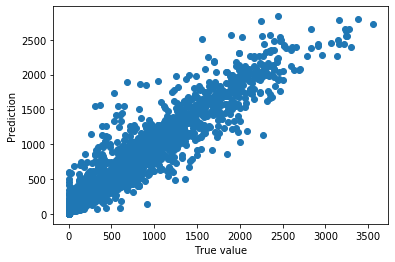

In [48]:
plt.scatter(y_test, pred)
plt.xlabel("True value")
plt.ylabel('Prediction')
plt.show()
plt.close()

In [49]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)

43060.50085996956

In [50]:
from sklearn.metrics import r2_score
r2_sc = r2_score(y_test, pred, multioutput= 'variance_weighted')
print (r2_sc)

0.8974425936364463


In [51]:
adj_r2 = 1 - (1-r2_sc)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print (adj_r2)

0.8967745952041932
